To run this notebook, the following Python modules are required:

* numpy
* xarray
* matplotlib
* cartopy
* cmaps

`cmaps` enables you to use the plentiful colormaps from [NCL](https://www.ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml).

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmaps

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


0.5 359.5
-89.5 89.5
(180, 360) (180, 360) (180, 360)
Common color limits: -1.7999994 31.566084


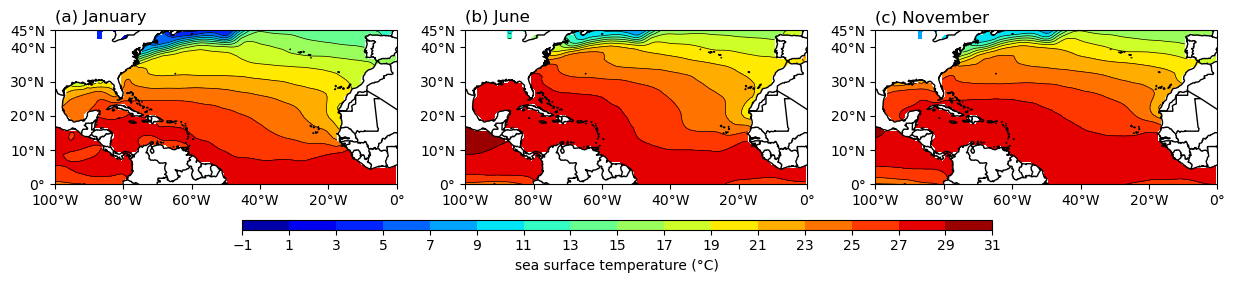

In [2]:
# Open the NetCDF file
file_path = "./dataset/sst.mon.ltm.1991-2020.nc"
ds = xr.open_dataset(file_path)
# print lon and lat range
print(ds['lon'].values.min(), ds['lon'].values.max())
print(ds['lat'].values.min(), ds['lat'].values.max())
# Define the region limits
lon_min, lon_max = 260, 360
lat_min, lat_max = 0, 45
# Extract the variables
var_name = 'sst'
data1 = ds[var_name].isel(time=0) # January
data2 = ds[var_name].isel(time=5) # June
data3 = ds[var_name].isel(time=10) # November
# check data dimension
print(data1.shape, data2.shape, data3.shape)
# Define the projection
projection = ccrs.PlateCarree()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=(15, 5))
# Define the data list and titles
data_list = [data1, data2, data3]
titles = ['(a) January', '(b) June', '(c) November']
# Find the common color limits
vmin = min(data1.min().values, data2.min().values, data3.min().values)
vmax = max(data1.max().values, data2.max().values, data3.max().values)
print("Common color limits:", vmin, vmax)
# round the limits to the nearest 1
vmin = int(vmin)
vmax = int(vmax) + 1
# define the levels
levels = range(vmin, vmax, 2)
# lon and lat ticks
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
# colormap
cmap = cmaps.MPL_jet
# Plot the data
for ax, data, title in zip(axes, data_list, titles):
    cs = ax.contourf(data['lon'], data['lat'], data, transform=projection, levels=levels, cmap=cmap)
    # add contour lines
    ax.contour(data['lon'], data['lat'], data, transform=projection, levels=levels, colors='k', linewidths=0.5)
    # Add features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=projection)
    # title position: left aligned
    ax.set_title(title, loc='left')
    # Set ticks
    ax.set_xticks([-100, -80, -60, -40, -20, 0], crs=projection)
    ax.set_yticks([0, 10, 20, 30, 40, 45], crs=projection)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
# Add a single colorbar for all subplots, colorbar position is below the subplots and horizontal
axins = fig.add_axes([0.25, 0.25, 0.5, 0.02])
fig.colorbar(cs, cax=axins, orientation='horizontal', ticks=levels, label='sea surface temperature (°C)')
# save the plot
save_path = './figures'
fig_name = '2.maps_with_subplots_sst_ltm'
plt.savefig(f'{save_path}/{fig_name}.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()